In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%matplotlib inline
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import re
from math import cos, sin, pi
import numpy as np
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 cos	 example_iterrows	 
get_column_descriptions	 load_csv	 load_dataframes	 load_object	 math	 np	 os	 pd	 pi	 
pickle	 re	 save_dataframes	 sin	 store_objects	 sys	 


In [2]:

dataframes_dict = load_dataframes(generations_df='generations_df', patriline_df='patriline_df',
                                  turnings_df='turnings_df')

Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\generations_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\generations_df.csv.
Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\patriline_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\patriline_df.csv.
Attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\turnings_df.pickle.
No pickle exists - attempting to load C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\csv\turnings_df.csv.


In [3]:

index_name = 'Patriarch Name'
patriline_df = dataframes_dict['patriline_df']
if 'Unnamed: 0' in patriline_df.columns:
    patriline_df = patriline_df.set_index('Unnamed: 0')
elif index_name in patriline_df.columns:
    patriline_df = patriline_df.set_index(index_name)
patriline_df.index.name = index_name

In [ ]:

patriline_df.sample(5).T

In [4]:

index_name = 'generation_name'
generations_df = dataframes_dict['generations_df']
if 'Unnamed: 0' in generations_df.columns:
    generations_df = generations_df.set_index('Unnamed: 0')
elif index_name in generations_df.columns:
    generations_df = generations_df.set_index(index_name)
generations_df.index.name = index_name

In [ ]:

generations_df.sample(5).T

In [5]:

index_name = 'turning_name'
turnings_df = dataframes_dict['turnings_df']
if 'Unnamed: 0' in turnings_df.columns:
    turnings_df = turnings_df.set_index('Unnamed: 0')
elif index_name in turnings_df.columns:
    turnings_df = turnings_df.set_index(index_name)
turnings_df.index.name = index_name

In [6]:

# Remove Late Medeival Saeculum
mask_series = (turnings_df['saeculum_name'] == 'Late Medeival')
turnings_df = turnings_df[~mask_series]

In [ ]:

turnings_df.sample(5).T

In [26]:

ccw_history_radius_dict = load_object('ccw_history_radius_dict')
cw_history_radius_dict = load_object('cw_history_radius_dict')
ccw_history_year_dict = load_object('ccw_history_year_dict')
cw_history_year_dict = load_object('cw_history_year_dict')

In [7]:

def polar_to_cartesian(r, theta):
    radians = theta*(pi/180)
    
    return int(r*cos(radians)), int(r*sin(radians))

In [14]:

def create_xy_list(history_radius_dict):
    xy_list = []
    for radius in sorted(history_radius_dict.keys()):
        year, theta = history_radius_dict[radius]
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [22]:

def add_spiral_labels(years_list, year_radius_dict):
    for i, year in enumerate(years_list):
        radius, theta = year_radius_dict[year]
        x, y = polar_to_cartesian(radius, theta)
        text_obj = plt.text(x, y, year, fontsize=16,
                            rotation=theta-90, rotation_mode='anchor')

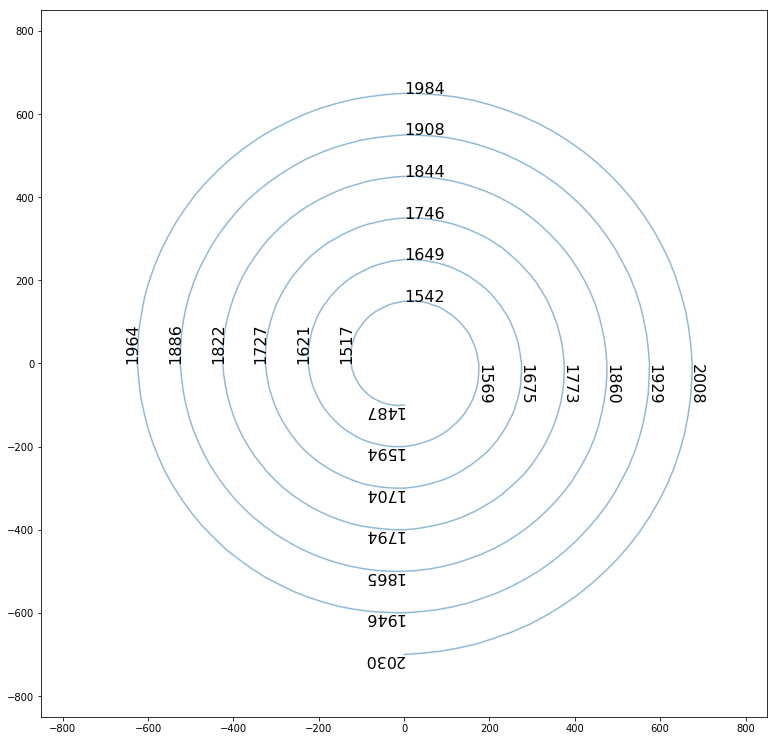

In [28]:

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-850, 850)
ax.set_ylim(-850, 850)
xy_list = create_xy_list(ccw_history_radius_dict)

PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list], alpha=0.5)
years_list = turnings_df['turning_begin_year'].tolist() + [turnings_df['turning_end_year'].max()+1]
add_spiral_labels(sorted(years_list), ccw_history_year_dict)

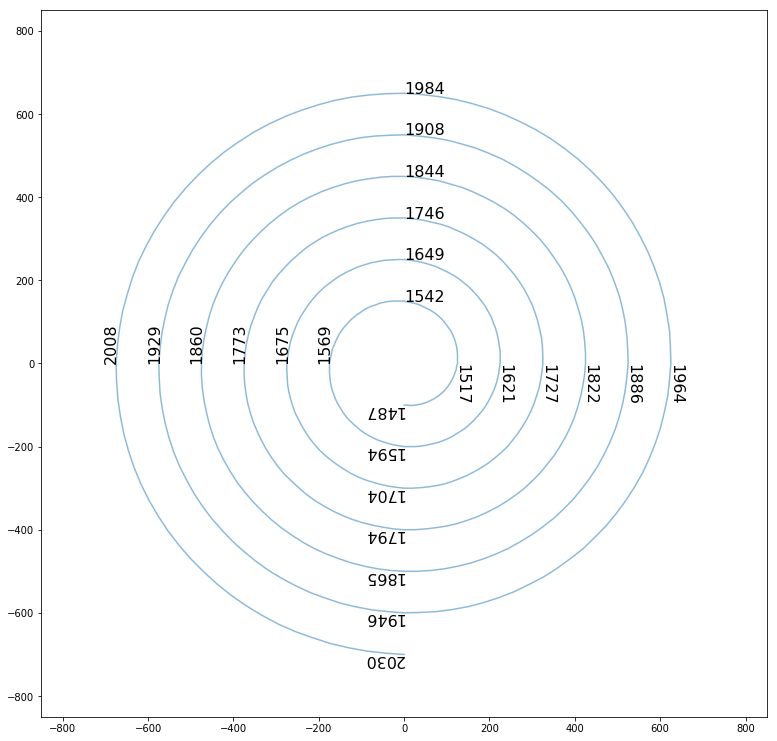

In [27]:

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-850, 850)
ax.set_ylim(-850, 850)
xy_list = create_xy_list(cw_history_radius_dict)

PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list], alpha=0.5)
years_list = turnings_df['turning_begin_year'].tolist() + [turnings_df['turning_end_year'].max()+1]
add_spiral_labels(sorted(years_list), cw_history_year_dict)

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))